In [1]:
import aster_processing_fn
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import rasterio
import xarray as xr
import rioxarray
import os
import numpy as np

In [2]:
#%matplotlib widget
%matplotlib inline

In [3]:
# Name airborne & aster files
airborne_tif = './airborne/YOSEMITE_IR_PLANE_2017Apr21_mosaicked_9_calCam.tif'
aster_tif = './aster/AST_L1T_00304212017185107_20170422082541_26960_ImageData14.tif'

In [4]:
print(rasterio.open(aster_tif).crs,rasterio.open(airborne_tif).crs)

EPSG:32611 EPSG:26911


In [5]:
# Load ASTER
aster_src = xr.open_rasterio(aster_tif)
res_aster = aster_src.transform[0]
#aster_src = aster_src.where(aster_src!=aster_src.nodatavals, np.nan)
aster_band = 14
aster_rad = aster_processing_fn.tir_dn2rad(aster_src, aster_band)
aster_tb =  aster_processing_fn.tir_rad2tb(aster_rad, aster_band)
aster_tb_degC = aster_tb-273.15
# Wait is this wrong? Should it be set CRS to airborne? Or are we correcting this
aster_tb_degC.rio.set_crs(aster_src.crs)

# Load Airborne
air_src = xr.open_rasterio(airborne_tif)
res_air = air_src.transform[0]
#air_src = air_src.where(air_src!=air_src.nodatavals, np.nan)

# Set airborne to Aster CRS
aster_src_repr = aster_tb_degC.rio.reproject_match(air_src)

# Mask Aster
#aster_src.where(air_src!=0)

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/computation.py:724: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/srv/conda/envs/notebook/lib/python3.8/site-packages/pyproj/crs/crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


In [6]:
# Just some checks
print(type(air_src),type(aster_src_repr))
print(air_src.attrs)
print(aster_src_repr.attrs)
# Reprojected doesn't show CRS? Is this ok?
aster_src_repr

<class 'xarray.core.dataarray.DataArray'> <class 'xarray.core.dataarray.DataArray'>
{'transform': (4.997728305315759, 0.0, 292000.0, 5.528368561547037e-14, 4.9944506104329776, 4193500.0), 'crs': '+init=epsg:26911', 'res': (4.997728305315759, 4.9944506104329776), 'is_tiled': 0, 'nodatavals': (-9999.0,), 'scales': (1.0,), 'offsets': (0.0,), 'AREA_OR_POINT': 'Area', 'TIFFTAG_DATETIME': '2017-04-21T18:47:34.621196'}
{'_FillValue': -9999.0, 'grid_mapping': 'spatial_ref'}


<xarray.DataArray (band: 1, y: 901, x: 2201)>
array([[[5.48858134, 5.2557229 , 5.2557229 , ..., 4.17779981,
         4.17779981, 4.17779981],
        [5.95274671, 5.2557229 , 5.2557229 , ..., 4.46008065,
         4.46008065, 4.46008065],
        [5.95274671, 5.2557229 , 5.2557229 , ..., 4.46008065,
         4.46008065, 4.46008065],
        ...,
        [3.80021898, 2.8024044 , 2.8024044 , ..., 0.97152736,
         0.97152736, 0.97152736],
        [3.80021898, 2.8024044 , 2.8024044 , ..., 0.97152736,
         0.97152736, 0.97152736],
        [3.80021898, 2.8024044 , 2.8024044 , ..., 0.97152736,
         0.97152736, 0.97152736]]])
Coordinates:
  * x            (x) float64 2.92e+05 2.92e+05 2.92e+05 ... 3.03e+05 3.03e+05
  * y            (y) float64 4.194e+06 4.194e+06 ... 4.198e+06 4.198e+06
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    _FillValue:    -9999.0
    grid_mapping:  spatial_ref

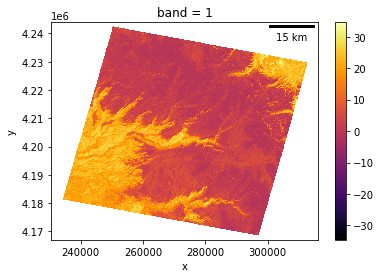

In [7]:
# Plot entire ASTER grid in degC
raster = aster_tb_degC

f, ax = plt.subplots()
raster.plot(cmap='inferno')
ax.add_artist(ScaleBar(1.0));

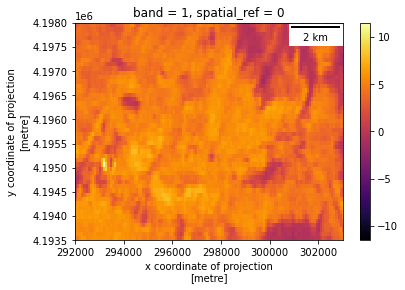

In [8]:
# Plot reprojected ASTER
raster = aster_src_repr
res = res_aster

f, ax = plt.subplots()
raster.plot(cmap='inferno')
ax.add_artist(ScaleBar(1.0));

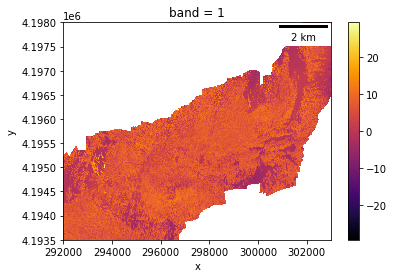

In [9]:
# Plot airborne
raster = air_src

f, ax = plt.subplots()
raster.plot(cmap='inferno')
ax.add_artist(ScaleBar(1.0));

In [10]:
# Calculate difference map
diff = aster_src_repr-air_src

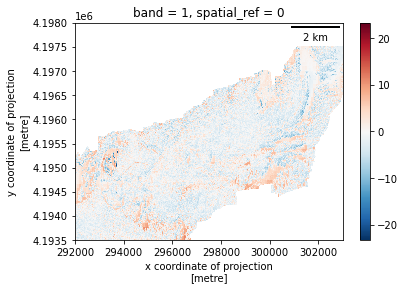

In [11]:
# Plot difference map
# how much warmer ASTER is?
raster = diff

f, ax = plt.subplots()
raster.plot()
ax.add_artist(ScaleBar(1.0));

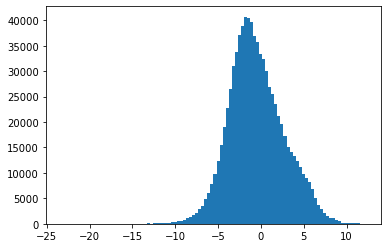

In [12]:
plt.hist(diff.values.ravel(),bins=100);

In [13]:
print('Mean diff=',diff.mean())
print('Median diff=',diff.median())
print('Min diff=',diff.min())
print('Max diff=',diff.max())

Mean diff= <xarray.DataArray ()>
array(-0.52033203)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-0.81787128)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-23.29330322)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(12.23552321)
Coordinates:
    spatial_ref  int64 0


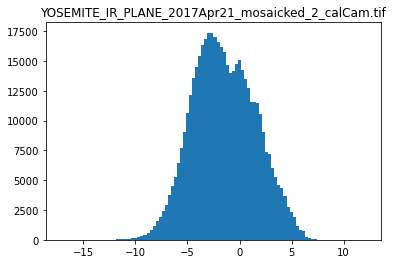

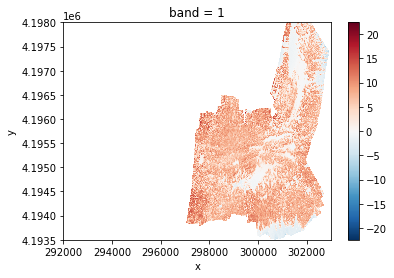

2017-04-21T18:12:56.281013
Mean diff= <xarray.DataArray ()>
array(-1.47321532)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-1.63957423)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-17.09853696)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(12.10347017)
Coordinates:
    spatial_ref  int64 0


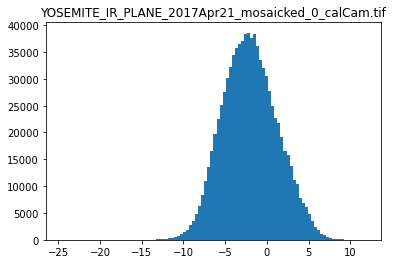

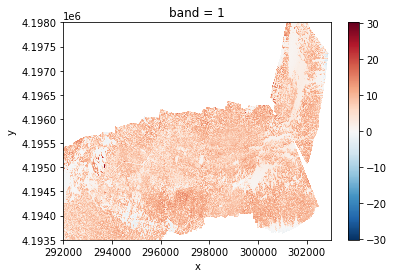

2017-04-21T18:02:38.528888
Mean diff= <xarray.DataArray ()>
array(-2.03538776)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-2.14560063)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-24.63510036)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(11.81667405)
Coordinates:
    spatial_ref  int64 0


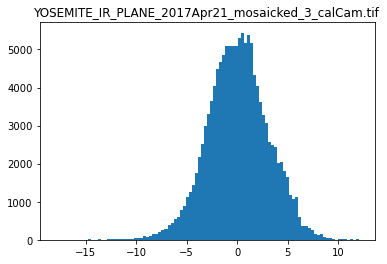

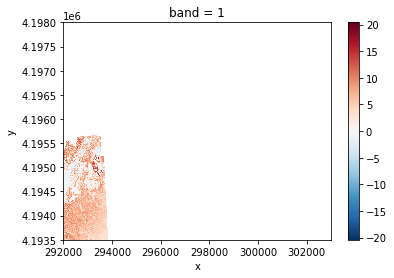

2017-04-21T18:15:30.408041
Mean diff= <xarray.DataArray ()>
array(0.09238023)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(0.09286574)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-18.03017727)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(12.08550337)
Coordinates:
    spatial_ref  int64 0


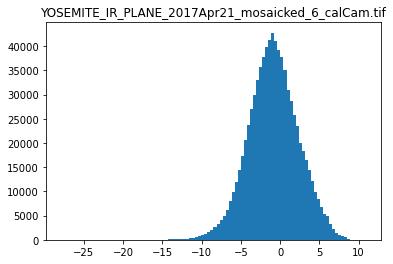

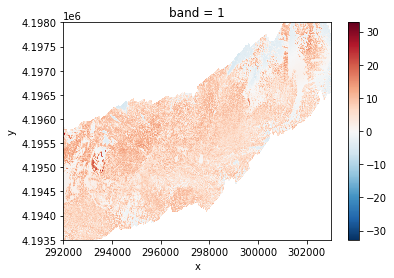

2017-04-21T18:29:54.579011
Mean diff= <xarray.DataArray ()>
array(-0.86035641)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-0.88289463)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-27.86078604)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(10.89825313)
Coordinates:
    spatial_ref  int64 0


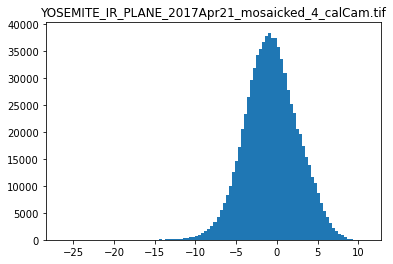

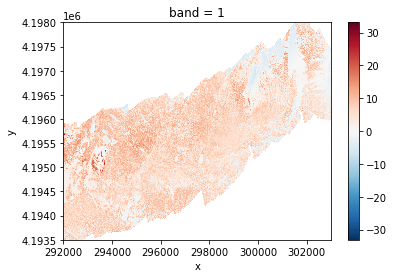

2017-04-21T18:19:38.536146
Mean diff= <xarray.DataArray ()>
array(-0.6988654)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-0.74927214)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-26.4704568)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(10.90323624)
Coordinates:
    spatial_ref  int64 0


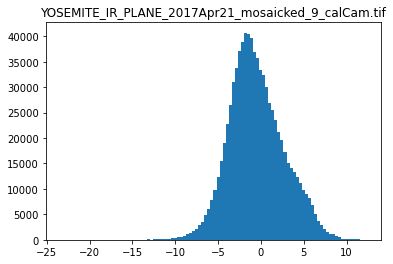

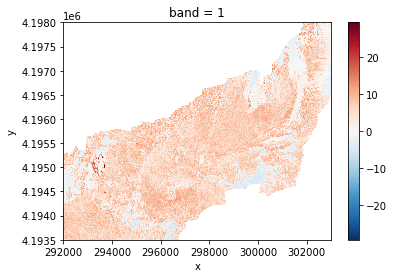

2017-04-21T18:47:34.621196
Mean diff= <xarray.DataArray ()>
array(-0.52033203)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-0.81787128)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-23.29330322)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(12.23552321)
Coordinates:
    spatial_ref  int64 0


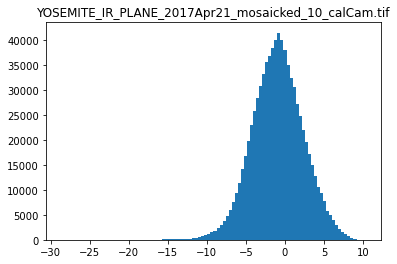

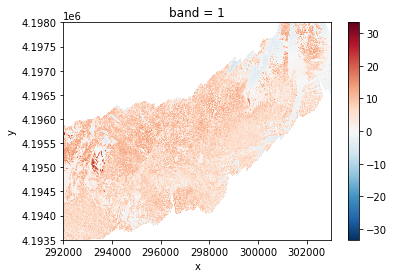

2017-04-21T18:53:34.558657
Mean diff= <xarray.DataArray ()>
array(-0.94304499)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-0.92572111)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-28.61896284)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(10.33534227)
Coordinates:
    spatial_ref  int64 0


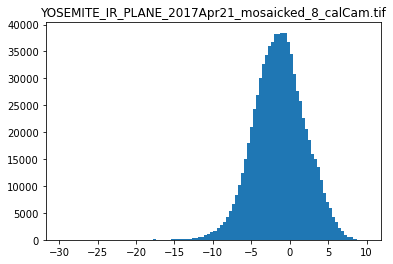

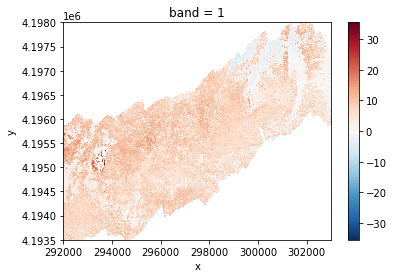

2017-04-21T18:41:21.872680
Mean diff= <xarray.DataArray ()>
array(-1.37200607)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-1.36772676)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-29.70944746)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(9.87239912)
Coordinates:
    spatial_ref  int64 0


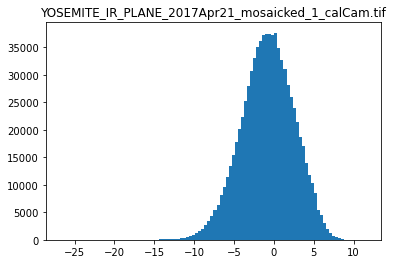

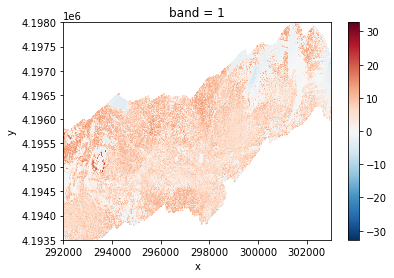

2017-04-21T18:08:56.017276
Mean diff= <xarray.DataArray ()>
array(-0.79373012)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-0.71927511)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-26.67504597)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(11.51828263)
Coordinates:
    spatial_ref  int64 0


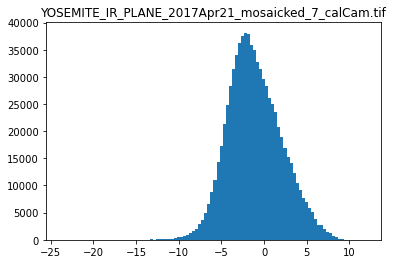

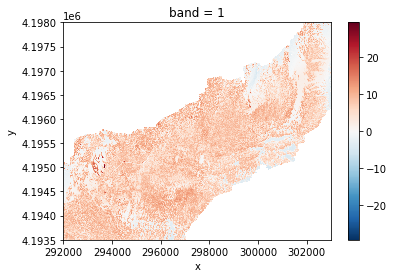

2017-04-21T18:35:29.461958
Mean diff= <xarray.DataArray ()>
array(-1.09261861)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-1.36008184)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-23.74868652)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(11.89630387)
Coordinates:
    spatial_ref  int64 0


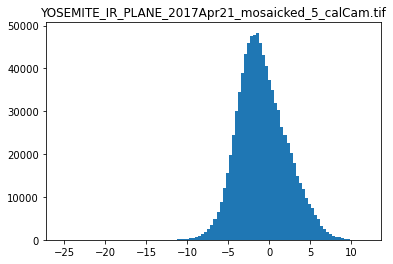

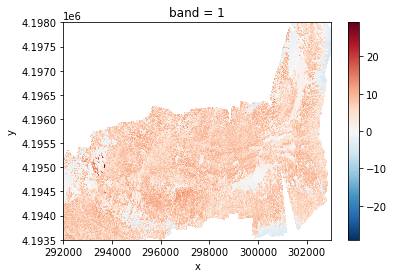

2017-04-21T18:24:38.581112
Mean diff= <xarray.DataArray ()>
array(-0.89618777)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-1.16998856)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-25.37990117)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(11.72835618)
Coordinates:
    spatial_ref  int64 0
Min mean <xarray.DataArray ()>
array(0.09238023)
Coordinates:
    spatial_ref  int64 0 YOSEMITE_IR_PLANE_2017Apr21_mosaicked_3_calCam.tif
Min median <xarray.DataArray ()>
array(0.09286574)
Coordinates:
    spatial_ref  int64 0 YOSEMITE_IR_PLANE_2017Apr21_mosaicked_3_calCam.tif
Min min <xarray.DataArray ()>
array(-17.09853696)
Coordinates:
    spatial_ref  int64 0 YOSEMITE_IR_PLANE_2017Apr21_mosaicked_2_calCam.tif
Min max <xarray.DataArray ()>
array(9.87239912)
Coordinates:
    spatial_ref  int64 0 YOSEMITE_IR_PLANE_2017Apr21_mosaicked_8_calCam.tif


In [14]:
# Loop through each mosaic to see which matches best
# https://stackoverflow.com/questions/42074311/loop-through-directory-of-images-and-rotate-them-all-x-degrees-and-save-to-direc

path = './airborne/'
min_min_diff = 10000
min_min_path = ''
min_max_diff = 10000
min_max_path = ''
min_mean_diff = 10000
min_mean_path = ''
min_median_diff = 10000
min_median_path = ''

for img_path in os.listdir(path):
    if(img_path!='YOSEMITE_EO_PLANE_2017Apr21_mosaicked_4_rgb.tif' and img_path!='YOSEMITE_EO_PLANE_2017Apr21_mosaicked_5_rgb.tif'):
        # Define image path
        input_path = os.path.join(path,img_path)
        # Read in tif
        air_src_1 = xr.open_rasterio(input_path)
        # Calculate difference
        diff_1 = aster_src_repr-air_src_1

        # Plot difference
        #f,ax = plt.subplots()
        plt.hist(diff_1.values.ravel(),bins=100)
        plt.title(img_path)
        plt.show()
        # Also plot the geotiff because some are super small
        air_src_1.plot()
        plt.show();

        # Print datetimes
        print(air_src_1.attrs['TIFFTAG_DATETIME'])
        # Print some stats
        print('Mean diff=',diff_1.mean())
        print('Median diff=',diff_1.median())
        print('Min diff=',diff_1.min())
        print('Max diff=',diff_1.max())

        # Compare stats
        if(abs(diff_1.mean())<abs(min_mean_diff)):
            min_mean_diff = diff_1.mean()
            min_mean_path = img_path
        if(abs(diff_1.median())<abs(min_median_diff)):
            min_median_diff = diff_1.median()
            min_median_path = img_path
        if(abs(diff_1.min())<abs(min_min_diff)):
            min_min_diff = diff_1.min()
            min_min_path = img_path
        if(abs(diff_1.max())<abs(min_max_diff)):
            min_max_diff = diff_1.max()
            min_max_path = img_path

# Print mosaic with "best" stats
print('Min mean',min_mean_diff,min_mean_path)
print('Min median',min_median_diff,min_median_path)
print('Min min',min_min_diff,min_min_path)
print('Min max',min_max_diff,min_max_path)

In [15]:
# Can't find datatime on aster
aster_src.attrs

{'transform': (90.0, 0.0, 230355.0, 0.0, -90.0, 4243905.0),
 'crs': '+init=epsg:32611',
 'res': (90.0, 90.0),
 'is_tiled': 0,
 'nodatavals': (0.0,),
 'scales': (1.0,),
 'offsets': (0.0,),
 'AREA_OR_POINT': 'Area'}

In [16]:
os.getcwd()

'/home/jovyan/project/aster-thermal'

Ok so just from stats/histograms it seems like Mosaic 2 or 3or 8 is best...check with datetime

Testing this & reprinting stats to hone in

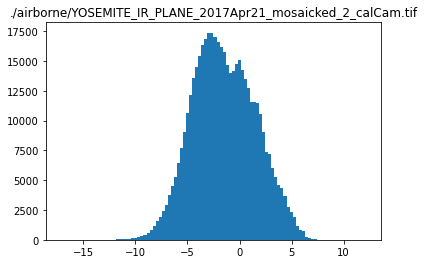

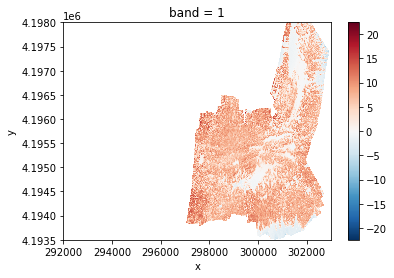

2017-04-21T18:12:56.281013
Mean diff= <xarray.DataArray ()>
array(-1.47321532)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-1.63957423)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-17.09853696)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(12.10347017)
Coordinates:
    spatial_ref  int64 0


In [17]:
input_path_2 = './airborne/YOSEMITE_IR_PLANE_2017Apr21_mosaicked_2_calCam.tif'
air_src_2 = xr.open_rasterio(input_path_2)
# Calculate difference
diff_2 = aster_src_repr-air_src_2
    
# Plot difference
#f,ax = plt.subplots()
plt.hist(diff_2.values.ravel(),bins=100)
plt.title(input_path_2)
plt.show()
# Also plot the geotiff because some are super small
air_src_2.plot()
plt.show();
    
# Print datetimes
print(air_src_2.attrs['TIFFTAG_DATETIME'])
# Print some stats
print('Mean diff=',diff_2.mean())
print('Median diff=',diff_2.median())
print('Min diff=',diff_2.min())
print('Max diff=',diff_2.max())

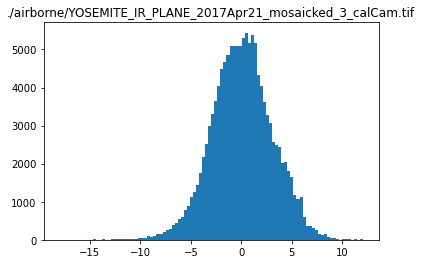

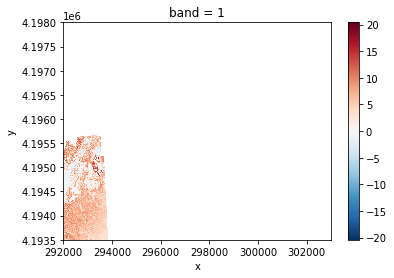

2017-04-21T18:15:30.408041
Mean diff= <xarray.DataArray ()>
array(0.09238023)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(0.09286574)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-18.03017727)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(12.08550337)
Coordinates:
    spatial_ref  int64 0


In [18]:
input_path_3 = './airborne/YOSEMITE_IR_PLANE_2017Apr21_mosaicked_3_calCam.tif'
air_src_3 = xr.open_rasterio(input_path_3)
# Calculate difference
diff_3 = aster_src_repr-air_src_3
    
# Plot difference
#f,ax = plt.subplots()
plt.hist(diff_3.values.ravel(),bins=100)
plt.title(input_path_3)
plt.show()
# Also plot the geotiff because some are super small
air_src_3.plot()
plt.show();
    
# Print datetimes
print(air_src_3.attrs['TIFFTAG_DATETIME'])
# Print some stats
print('Mean diff=',diff_3.mean())
print('Median diff=',diff_3.median())
print('Min diff=',diff_3.min())
print('Max diff=',diff_3.max())

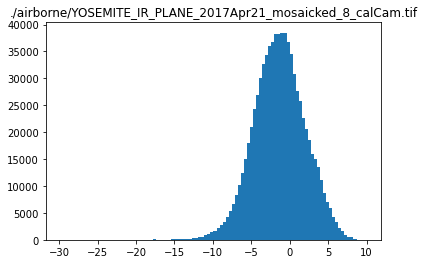

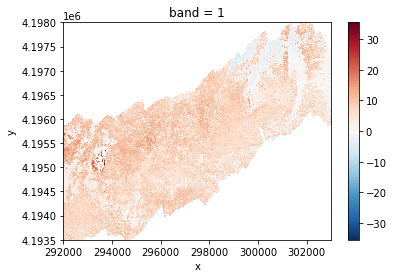

2017-04-21T18:41:21.872680
Mean diff= <xarray.DataArray ()>
array(-1.37200607)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-1.36772676)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-29.70944746)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(9.87239912)
Coordinates:
    spatial_ref  int64 0


In [19]:
input_path_8 = './airborne/YOSEMITE_IR_PLANE_2017Apr21_mosaicked_8_calCam.tif'
air_src_8 = xr.open_rasterio(input_path_8)
# Calculate difference
diff_8 = aster_src_repr-air_src_8
    
# Plot difference
#f,ax = plt.subplots()
plt.hist(diff_8.values.ravel(),bins=100)
plt.title(input_path_8)
plt.show()
# Also plot the geotiff because some are super small
air_src_8.plot()
plt.show();
    
# Print datetimes
print(air_src_8.attrs['TIFFTAG_DATETIME'])
# Print some stats
print('Mean diff=',diff_8.mean())
print('Median diff=',diff_8.median())
print('Min diff=',diff_8.min())
print('Max diff=',diff_8.max())

Not sure about the shape of 2 and 3 tho...loop through without the smaller tifs

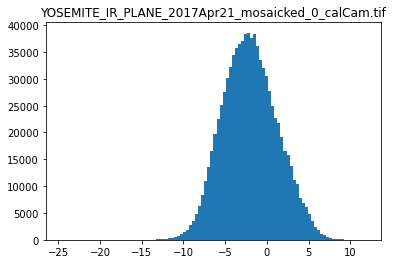

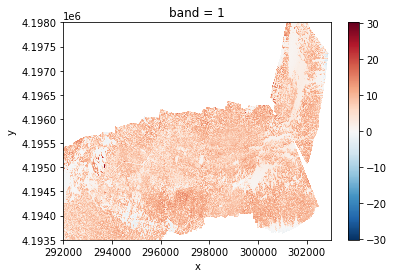

2017-04-21T18:02:38.528888
Mean diff= <xarray.DataArray ()>
array(-2.03538776)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-2.14560063)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-24.63510036)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(11.81667405)
Coordinates:
    spatial_ref  int64 0


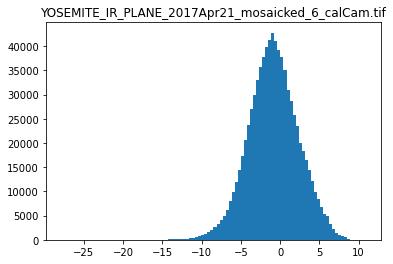

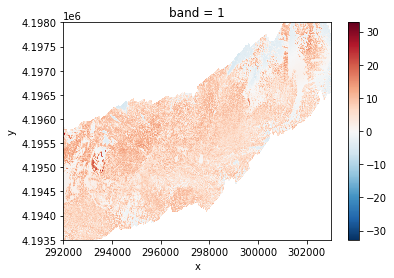

2017-04-21T18:29:54.579011
Mean diff= <xarray.DataArray ()>
array(-0.86035641)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-0.88289463)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-27.86078604)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(10.89825313)
Coordinates:
    spatial_ref  int64 0


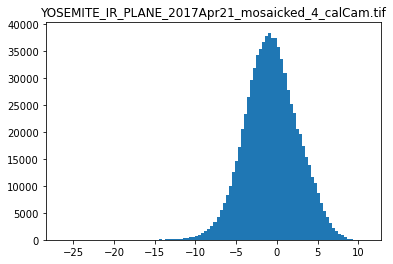

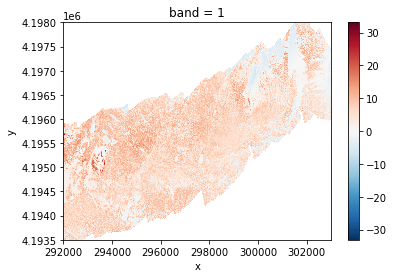

2017-04-21T18:19:38.536146
Mean diff= <xarray.DataArray ()>
array(-0.6988654)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-0.74927214)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-26.4704568)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(10.90323624)
Coordinates:
    spatial_ref  int64 0


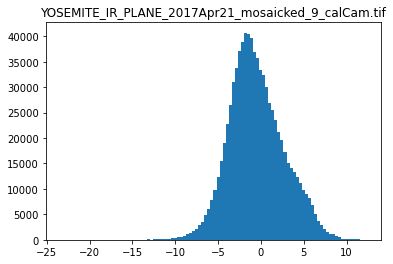

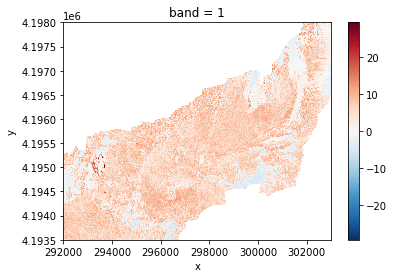

2017-04-21T18:47:34.621196
Mean diff= <xarray.DataArray ()>
array(-0.52033203)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-0.81787128)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-23.29330322)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(12.23552321)
Coordinates:
    spatial_ref  int64 0


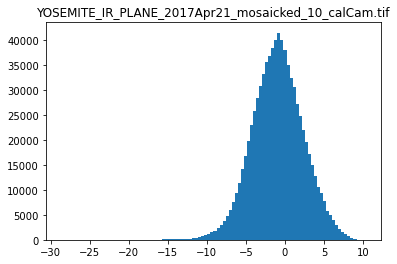

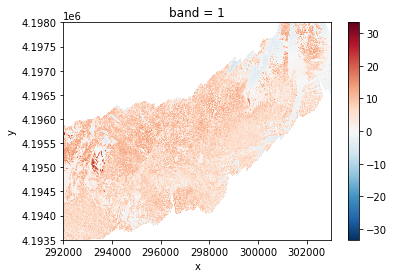

2017-04-21T18:53:34.558657
Mean diff= <xarray.DataArray ()>
array(-0.94304499)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-0.92572111)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-28.61896284)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(10.33534227)
Coordinates:
    spatial_ref  int64 0


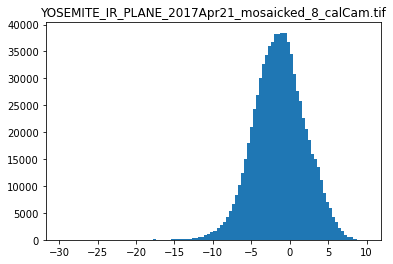

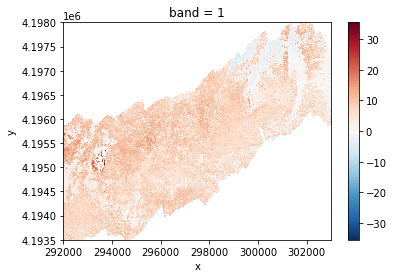

2017-04-21T18:41:21.872680
Mean diff= <xarray.DataArray ()>
array(-1.37200607)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-1.36772676)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-29.70944746)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(9.87239912)
Coordinates:
    spatial_ref  int64 0


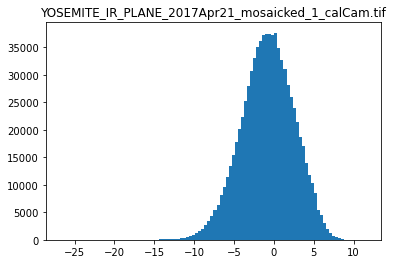

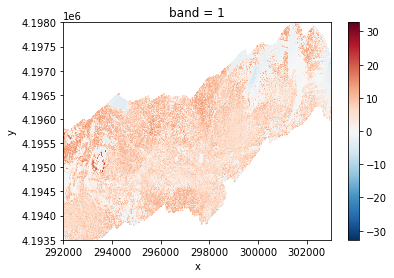

2017-04-21T18:08:56.017276
Mean diff= <xarray.DataArray ()>
array(-0.79373012)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-0.71927511)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-26.67504597)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(11.51828263)
Coordinates:
    spatial_ref  int64 0


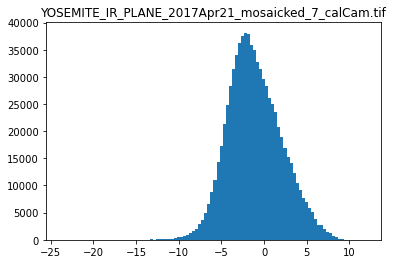

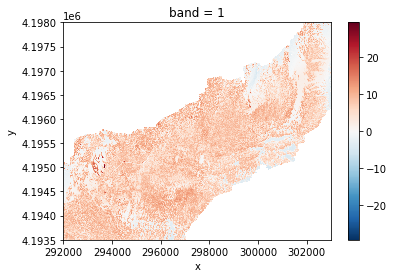

2017-04-21T18:35:29.461958
Mean diff= <xarray.DataArray ()>
array(-1.09261861)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-1.36008184)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-23.74868652)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(11.89630387)
Coordinates:
    spatial_ref  int64 0


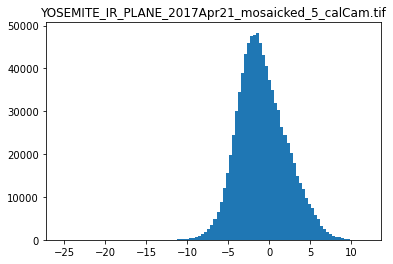

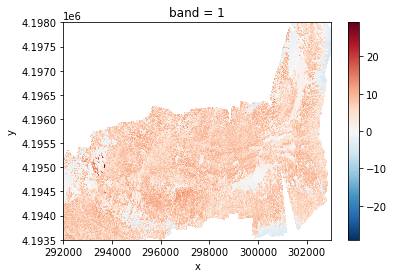

2017-04-21T18:24:38.581112
Mean diff= <xarray.DataArray ()>
array(-0.89618777)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-1.16998856)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-25.37990117)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(11.72835618)
Coordinates:
    spatial_ref  int64 0
Min mean <xarray.DataArray ()>
array(-0.52033203)
Coordinates:
    spatial_ref  int64 0 YOSEMITE_IR_PLANE_2017Apr21_mosaicked_9_calCam.tif
Min median <xarray.DataArray ()>
array(-0.71927511)
Coordinates:
    spatial_ref  int64 0 YOSEMITE_IR_PLANE_2017Apr21_mosaicked_1_calCam.tif
Min min <xarray.DataArray ()>
array(-23.29330322)
Coordinates:
    spatial_ref  int64 0 YOSEMITE_IR_PLANE_2017Apr21_mosaicked_9_calCam.tif
Min max <xarray.DataArray ()>
array(9.87239912)
Coordinates:
    spatial_ref  int64 0 YOSEMITE_IR_PLANE_2017Apr21_mosaicked_8_calCam.tif


In [20]:
# Loop through each mosaic to see which matches best
# https://stackoverflow.com/questions/42074311/loop-through-directory-of-images-and-rotate-them-all-x-degrees-and-save-to-direc

path = './airborne/'
min_min_diff = 10000
min_min_path = ''
min_max_diff = 10000
min_max_path = ''
min_mean_diff = 10000
min_mean_path = ''
min_median_diff = 10000
min_median_path = ''

for img_path in os.listdir(path):
    if(img_path!='YOSEMITE_IR_PLANE_2017Apr21_mosaicked_2_calCam.tif' and img_path!='YOSEMITE_IR_PLANE_2017Apr21_mosaicked_3_calCam.tif'
      and img_path!='YOSEMITE_EO_PLANE_2017Apr21_mosaicked_4_rgb.tif' and img_path!='YOSEMITE_EO_PLANE_2017Apr21_mosaicked_5_rgb.tif'):
        # Define image path
        input_path = os.path.join(path,img_path)
        # Read in tif
        air_src_1 = xr.open_rasterio(input_path)
        # Calculate difference
        diff_1 = aster_src_repr-air_src_1

        # Plot difference
        plt.hist(diff_1.values.ravel(),bins=100)
        plt.title(img_path)
        plt.show()
        # Also plot the geotiff because some are super small
        air_src_1.plot()
        plt.show();

        # Print datetimes
        print(air_src_1.attrs['TIFFTAG_DATETIME'])
        # Print some stats
        print('Mean diff=',diff_1.mean())
        print('Median diff=',diff_1.median())
        print('Min diff=',diff_1.min())
        print('Max diff=',diff_1.max())

        # Compare stats
        if(abs(diff_1.mean())<abs(min_mean_diff)):
            min_mean_diff = diff_1.mean()
            min_mean_path = img_path
        if(abs(diff_1.median())<abs(min_median_diff)):
            min_median_diff = diff_1.median()
            min_median_path = img_path
        if(abs(diff_1.min())<abs(min_min_diff)):
            min_min_diff = diff_1.min()
            min_min_path = img_path
        if(abs(diff_1.max())<abs(min_max_diff)):
            min_max_diff = diff_1.max()
            min_max_path = img_path

# Print mosaic with "best" stats
print('Min mean',min_mean_diff,min_mean_path)
print('Min median',min_median_diff,min_median_path)
print('Min min',min_min_diff,min_min_path)
print('Min max',min_max_diff,min_max_path)

Ok, now 9, 1, and 8 look better...look at those

Why does this look so red yet the average is negative and the histogram backs this up?

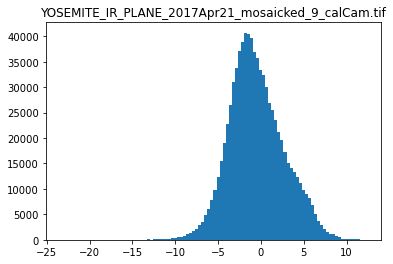

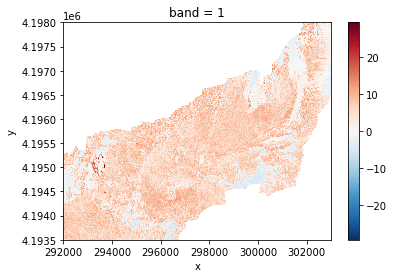

2017-04-21T18:47:34.621196
Mean diff= <xarray.DataArray ()>
array(-0.52033203)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-0.81787128)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-23.29330322)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(12.23552321)
Coordinates:
    spatial_ref  int64 0


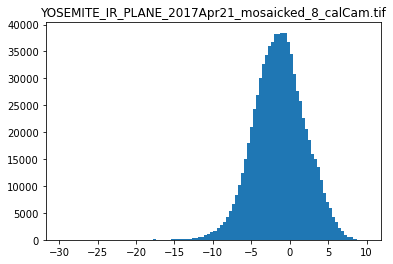

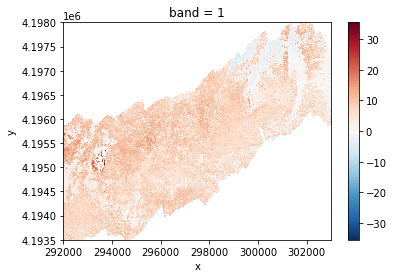

2017-04-21T18:41:21.872680
Mean diff= <xarray.DataArray ()>
array(-1.37200607)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-1.36772676)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-29.70944746)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(9.87239912)
Coordinates:
    spatial_ref  int64 0


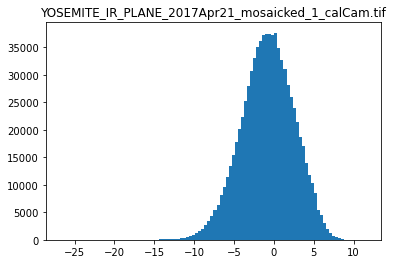

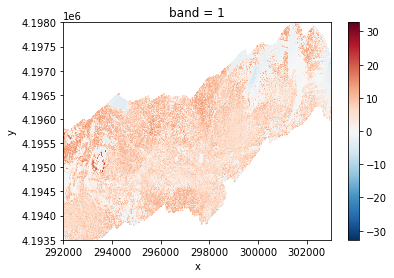

2017-04-21T18:08:56.017276
Mean diff= <xarray.DataArray ()>
array(-0.79373012)
Coordinates:
    spatial_ref  int64 0
Median diff= <xarray.DataArray ()>
array(-0.71927511)
Coordinates:
    spatial_ref  int64 0
Min diff= <xarray.DataArray ()>
array(-26.67504597)
Coordinates:
    spatial_ref  int64 0
Max diff= <xarray.DataArray ()>
array(11.51828263)
Coordinates:
    spatial_ref  int64 0
Min mean <xarray.DataArray ()>
array(-0.52033203)
Coordinates:
    spatial_ref  int64 0 YOSEMITE_IR_PLANE_2017Apr21_mosaicked_9_calCam.tif
Min median <xarray.DataArray ()>
array(-0.71927511)
Coordinates:
    spatial_ref  int64 0 YOSEMITE_IR_PLANE_2017Apr21_mosaicked_1_calCam.tif
Min min <xarray.DataArray ()>
array(-23.29330322)
Coordinates:
    spatial_ref  int64 0 YOSEMITE_IR_PLANE_2017Apr21_mosaicked_9_calCam.tif
Min max <xarray.DataArray ()>
array(9.87239912)
Coordinates:
    spatial_ref  int64 0 YOSEMITE_IR_PLANE_2017Apr21_mosaicked_8_calCam.tif


In [21]:
# Loop through each mosaic to see which matches best
# https://stackoverflow.com/questions/42074311/loop-through-directory-of-images-and-rotate-them-all-x-degrees-and-save-to-direc

path = './airborne/'
min_min_diff = 10000
min_min_path = ''
min_max_diff = 10000
min_max_path = ''
min_mean_diff = 10000
min_mean_path = ''
min_median_diff = 10000
min_median_path = ''

for img_path in os.listdir(path):
    if(img_path=='YOSEMITE_IR_PLANE_2017Apr21_mosaicked_1_calCam.tif' or img_path=='YOSEMITE_IR_PLANE_2017Apr21_mosaicked_8_calCam.tif' or img_path=='YOSEMITE_IR_PLANE_2017Apr21_mosaicked_9_calCam.tif'):
        # Define image path
        input_path = os.path.join(path,img_path)
        # Read in tif
        air_src_1 = xr.open_rasterio(input_path)
        # Calculate difference
        diff_1 = aster_src_repr-air_src_1

        # Plot difference
        #f,ax = plt.subplots()
        plt.hist(diff_1.values.ravel(),bins=100)
        plt.title(img_path)
        plt.show()
        # Also plot the geotiff because some are super small
        air_src_1.plot()
        plt.show();

        # Print datetimes
        print(air_src_1.attrs['TIFFTAG_DATETIME'])
        # Print some stats
        print('Mean diff=',diff_1.mean())
        print('Median diff=',diff_1.median())
        print('Min diff=',diff_1.min())
        print('Max diff=',diff_1.max())

        # Compare stats
        if(abs(diff_1.mean())<abs(min_mean_diff)):
            min_mean_diff = diff_1.mean()
            min_mean_path = img_path
        if(abs(diff_1.median())<abs(min_median_diff)):
            min_median_diff = diff_1.median()
            min_median_path = img_path
        if(abs(diff_1.min())<abs(min_min_diff)):
            min_min_diff = diff_1.min()
            min_min_path = img_path
        if(abs(diff_1.max())<abs(min_max_diff)):
            min_max_diff = diff_1.max()
            min_max_path = img_path

# Print mosaic with "best" stats
print('Min mean',min_mean_diff,min_mean_path)
print('Min median',min_median_diff,min_median_path)
print('Min min',min_min_diff,min_min_path)
print('Min max',min_max_diff,min_max_path)

Ok so leaning towards 9 but 1 and 9 are comparable...check with datetime

In [22]:
#185107